In [133]:
# import the needed libraries
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
from sklearn.model_selection import StratifiedKFold,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [134]:
# Load the train and the test dataset
Income_train_df = pd.read_csv('train.csv')
Income_test_df = pd.read_csv('test.csv')

In [135]:
# explore the train and test set 
Income_train_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [136]:
Income_test_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [137]:
print('The shape of the train dataset is: ',Income_train_df.shape)
print('The shape of the test dataset is: ',Income_test_df.shape)

The shape of the train dataset is:  (9557, 143)
The shape of the test dataset is:  (23856, 142)


In [138]:
# Understand the type of data. (dtypes: float64(8), int64(130), object(5))
Income_train_df.info(max_cols=143)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 143 columns):
 #    Column           Non-Null Count  Dtype  
---   ------           --------------  -----  
 0    Id               9557 non-null   object 
 1    v2a1             2697 non-null   float64
 2    hacdor           9557 non-null   int64  
 3    rooms            9557 non-null   int64  
 4    hacapo           9557 non-null   int64  
 5    v14a             9557 non-null   int64  
 6    refrig           9557 non-null   int64  
 7    v18q             9557 non-null   int64  
 8    v18q1            2215 non-null   float64
 9    r4h1             9557 non-null   int64  
 10   r4h2             9557 non-null   int64  
 11   r4h3             9557 non-null   int64  
 12   r4m1             9557 non-null   int64  
 13   r4m2             9557 non-null   int64  
 14   r4m3             9557 non-null   int64  
 15   r4t1             9557 non-null   int64  
 16   r4t2             9557 non-null   int64  

In [139]:
# columns of Integer Type:
Income_train_df.select_dtypes(np.int64).columns

Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)

In [140]:
# columns of Float Type:
Income_train_df.select_dtypes(np.float64).columns

Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')

In [141]:
# columns of object Type:
Income_train_df.select_dtypes(np.object).columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [142]:
# Understand the type of data. (float64(8), int64(129), object(5))
Income_test_df.info(max_cols=142)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 142 columns):
 #    Column           Non-Null Count  Dtype  
---   ------           --------------  -----  
 0    Id               23856 non-null  object 
 1    v2a1             6453 non-null   float64
 2    hacdor           23856 non-null  int64  
 3    rooms            23856 non-null  int64  
 4    hacapo           23856 non-null  int64  
 5    v14a             23856 non-null  int64  
 6    refrig           23856 non-null  int64  
 7    v18q             23856 non-null  int64  
 8    v18q1            5730 non-null   float64
 9    r4h1             23856 non-null  int64  
 10   r4h2             23856 non-null  int64  
 11   r4h3             23856 non-null  int64  
 12   r4m1             23856 non-null  int64  
 13   r4m2             23856 non-null  int64  
 14   r4m3             23856 non-null  int64  
 15   r4t1             23856 non-null  int64  
 16   r4t2             23856 non-null  int64

In [143]:
# check the output variable.
Income_train_df['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

<AxesSubplot:>

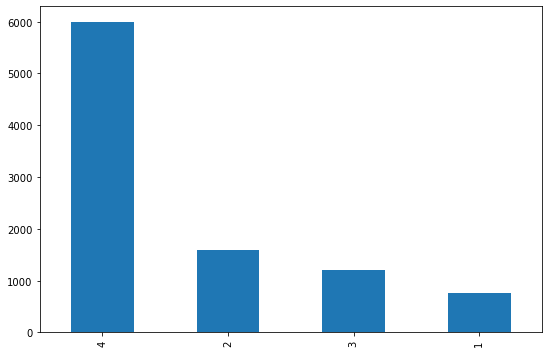

In [144]:
Income_train_df['Target'].value_counts().plot.bar(figsize = (9, 6))

There is biases in the dataset. 
* 1 = extreme poverty, the smallest count
* 2 = moderate poverty
* 3 = vulnerable households
* 4 = non vulnerable households

In [145]:
same_level = Income_train_df.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
same_level

idhogar
001ff74ca    True
003123ec2    True
004616164    True
004983866    True
005905417    True
             ... 
ff9343a35    True
ff9d5ab17    True
ffae4a097    True
ffe90d46f    True
fff7d6be1    True
Name: Target, Length: 2988, dtype: bool

In [146]:
# There is 85 houses where all the members of the house doesn't have the same poverty level.
not_same_level = same_level[same_level != True]
not_same_level.value_counts()

False    85
Name: Target, dtype: int64

In [147]:
# there is 15 house without a family head.
family_head = Income_train_df.groupby('idhogar')['parentesco1'].sum()
family_head.value_counts()

1    2973
0      15
Name: parentesco1, dtype: int64

In [148]:
# Set the poverty level of the members and the head of the house same in a family.
for household in not_same_level.index: 
    head_lable = int(Income_train_df[(Income_train_df['idhogar'] == household)&(Income_train_df['parentesco1'] == 1.0)]['Target'])
    Income_train_df.loc[Income_train_df['idhogar'] == household, 'Target'] = head_lable

In [149]:
# Count how many null values are existing in columns.
null_values_col = Income_train_df.isna().sum()
null_values_col[null_values_col>0] 

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

### Null values columns:
1. v2a1, Monthly rent payment:
    * tipovivi1, =1 own and fully paid house (pay = 0)
    * tipovivi2, "=1 own, paying in installments"
    * tipovivi3, =1 rented
    * tipovivi4, =1 precarious
    * tipovivi5, "=1 other(assigned, borrowed)"
    
    
2. v18q1, number of tablets household owns:
    * v18q, owns a tablet


3. rez_esc, Years behind in school

4. meaneduc,average years of education for adults (18+)

In [150]:
# 1. v2a1, Monthly rent payment(total null value = 6860)
rent_payment = Income_train_df[(Income_train_df['tipovivi5'] == 1) | (Income_train_df['tipovivi4'] == 1)| (Income_train_df['tipovivi1'] == 1)]
rent_payment.shape[0]
rent_payment[['tipovivi5','tipovivi4','tipovivi1']].head()

,tipovivi5,tipovivi4,tipovivi1
2,0,0,1
13,0,0,1
14,0,0,1
26,0,0,1
32,0,0,1


In [151]:
# value of rent payment is null when the house is owned or precarious or other(assigned, borrowed)
# thought replace all null value of the v2a1 columns with 0
Income_train_df['v2a1'].fillna(value =0 , inplace =True)

In [152]:
# 2. v18q1, number of tablets household owns. (total null value = 7342)
# check v18q(owns a tablet, no = 0, yes = 1)
num_tablets = Income_train_df[Income_train_df['v18q'] == 0]
print(num_tablets.shape[0])
num_tablets[['v18q','v18q1']].head()

7342


,v18q,v18q1
0,0,NaN
2,0,NaN
7,0,NaN
8,0,NaN
9,0,NaN


In [153]:
# value of number of tablets is null when the household doesn't owns a tablet
# thought replace all null value of the v18q1 columns with 0
Income_train_df['v18q1'].fillna(value =0 , inplace =True)

In [154]:
# 3. rez_esc, Years behind in school. (total null value = 7928) 
# escolari, years of schooling
# age= Age in years 
schooling_age = Income_train_df[Income_train_df['age'] < 7]
print(schooling_age.shape[0]) 
schooling_age = schooling_age['rez_esc'].isna().sum().sum()
schooling_age

901


901

In [155]:
schooling_years = Income_train_df[Income_train_df['escolari'] == 0]
print(schooling_years.shape[0])
schooling_years[['escolari','rez_esc']].head(10)
schooling_years = schooling_years['rez_esc'].isna().sum().sum()
schooling_years

1307


1203

In [156]:
behind_school = Income_train_df[Income_train_df['rez_esc'].notnull()]
behind_school['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [157]:
Income_train_df['rez_esc'].fillna(value =0 , inplace =True)

In [158]:
# 4. meaneduc,average years of education for adults (18+) (total null value = 5)
# instlevel1, =1 no level of education
average_edu_18 = Income_train_df[Income_train_df['meaneduc'].isna()]
print(average_edu_18.shape[0])
average_edu_18[['meaneduc','instlevel1']].head()

5


,meaneduc,instlevel1
1291,NaN,0
1840,NaN,0
1841,NaN,0
2049,NaN,0
2050,NaN,0


In [159]:
Income_train_df['meaneduc'].fillna(value =0 , inplace =True)

In [160]:
null_values_col_test = Income_test_df.isna().sum()
null_values_col_test[null_values_col_test>0]

v2a1         17403
v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64

In [161]:
Income_test_df['v2a1'].fillna(value =0 , inplace =True)
Income_test_df['v18q1'].fillna(value =0 , inplace =True)
Income_test_df['rez_esc'].fillna(value =0 , inplace =True)
Income_test_df['meaneduc'].fillna(value =0 , inplace =True)

In [162]:
# There is zero null value rows of the target variable.
Income_train_df['Target'].isna().sum()

0

In [163]:
# fix object feature and do ss
train_df_object = Income_train_df.select_dtypes(np.object).columns
test_df_object = Income_test_df.select_dtypes(np.object).columns
print(train_df_object)
print(test_df_object)

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


In [164]:
Income_train_df[['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa']].head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


### from the income qualification project description
101. dependency, Dependency rate, calculated = (number of members of the household
younger than 19 or older than 64)/(number of member of household between 19 and 64)
102. edjefe, years of education of male head of household, based on the interaction of
escolari (years of education), head of household and gender, yes=1 and no=0
103. edjefa, years of education of female head of household, based on the interaction of
escolari (years of education), head of household and gender, yes=1 and no=0

In [165]:
# fix the three object features 'dependency', 'edjefe', 'edjefa', with yes=1 and no=0
# train df
Income_train_df[[ 'dependency', 'edjefe', 'edjefa']] = Income_train_df[[ 'dependency', 'edjefe', 'edjefa']].replace({'yes': 1, 'no': 0}).astype(np.float64)
Income_train_df.select_dtypes(np.object).columns

Index(['Id', 'idhogar'], dtype='object')

In [166]:
#test df 
Income_test_df[[ 'dependency', 'edjefe', 'edjefa']] = Income_test_df[[ 'dependency', 'edjefe', 'edjefa']].replace({'yes': 1, 'no': 0}).astype(np.float64)
Income_test_df.select_dtypes(np.object).columns

Index(['Id', 'idhogar'], dtype='object')

### Features with the same information:
1. Household size:
    * tamhog, size of the household
    * hhsize, household size
-----------------------------------------------------------------------------------
2. Total number of persons in household:
    * hogar_total, # of total individuals in the household
    * r4t3, Total persons in the household
    * tamviv, number of persons living in the household

keep 'tamviv' and  'hhsize' and drop 'hogar_total', 'r4t3', 'tamhog'

In [167]:
print('The shape of the train dataset is: ',Income_train_df.shape)
print('The shape of the test dataset is: ',Income_test_df.shape)


# drpo columns 
columns = ['Id', 'idhogar', 'hogar_total', 'r4t3', 'tamhog', 'SQBescolari', 'SQBage', 'SQBhogar_total',
           'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

Income_train_df.drop(columns, axis=1, inplace= True)
Income_test_df.drop(columns, axis=1, inplace= True)

print('The shape of the train dataset is: ',Income_train_df.shape)
print('The shape of the test dataset is: ',Income_test_df.shape)

The shape of the train dataset is:  (9557, 143)
The shape of the test dataset is:  (23856, 142)
The shape of the train dataset is:  (9557, 129)
The shape of the test dataset is:  (23856, 128)


In [168]:
# split train dataset unto train and validation set 
x = Income_train_df.drop(['Target'], axis=1) 
y = Income_train_df['Target']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=42)

In [169]:
# Predict the accuracy using random forest classifier.
rfc = RandomForestClassifier(random_state=10)
rfc.fit(x_train, y_train)
y_predict = rfc.predict(x_valid)

In [170]:
print(accuracy_score(y_valid,y_predict))
print(confusion_matrix(y_valid,y_predict))
print(classification_report(y_valid,y_predict))

0.9368200836820084
[[ 185    1    0   26]
 [   4  332    0   41]
 [   0    7  241   62]
 [   0    8    2 1481]]
              precision    recall  f1-score   support

           1       0.98      0.87      0.92       212
           2       0.95      0.88      0.92       377
           3       0.99      0.78      0.87       310
           4       0.92      0.99      0.96      1491

    accuracy                           0.94      2390
   macro avg       0.96      0.88      0.92      2390
weighted avg       0.94      0.94      0.94      2390



In [171]:
y_predict_testdata = rfc.predict(Income_test_df)
y_predict_testdata

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [172]:
f_importances = pd.DataFrame({'feature': x.columns, 'importance': rfc.feature_importances_}) 
f_importances.sort_values(by='importance', ascending = False, inplace = True)
f_importances.head()

,feature,importance
98,meaneduc,0.070872
95,dependency,0.044571
109,overcrowding,0.033346
92,hogar_nin,0.030883
96,edjefe,0.029759


In [173]:
# Check the accuracy using a random forest with cross-validation.
Stratified_KFold = StratifiedKFold(n_splits=5,shuffle=True,random_state=7)
print(cross_val_score(rfc, x, y, cv=Stratified_KFold, scoring='accuracy'))

[0.94194561 0.93776151 0.94871795 0.94400837 0.94557823]
